In [78]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.patches
from ipywidgets import interactive
import ipywidgets as widgets
from ipywidgets import Layout,Button,Box,VBox,Label
import plotly as ply
from dance_sim_tools.ipywidget_helpers import slider
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import scipy.stats
import matplotlib.gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [102]:
def bootstrap_ri(m,logN,prct_val,cutoff_ind,which_fly):
    which_fly = int(which_fly)
    m = int(m)
    N = int(10**logN)
    cutoff_ind = int(cutoff_ind)
    prct_val = int(prct_val)
    ri_filename = 'ris_F1.txt'    
    empirical_ris = np.abs(np.loadtxt(ri_filename))
    num_flies,max_ind = np.shape(empirical_ris)
    empirical_ris[empirical_ris<0.01] = np.nan
    empirical_ris = np.degrees(empirical_ris)*(np.pi/9)/2.4
 
    #r_i matrix: (rows=flies,cols=reversal indices)
    #N: number of subsample iterations
    #For N iterations, draw m subsamples of r_i, and mean(r_1-r_0) using only the subsample

    last_reversal_inds = np.sum(~np.isnan(empirical_ris),axis=1) #for each fly, the index of the last r_i
    fly_counts_by_ind = np.sum(~np.isnan(empirical_ris),axis=0)
    ri_sample_means = np.full((cutoff_ind,N),np.nan)
   
    
    for i in range(cutoff_ind):
        for j in range(N):
            r_i_draw_inds = np.arange(num_flies) #this is which FLIES to draw
            r_i_draw_inds = r_i_draw_inds[~np.isnan(empirical_ris[:,i])]
            np.random.shuffle(r_i_draw_inds)
            r_i_draw_inds_ss = r_i_draw_inds[:m]
            ris_draw =  empirical_ris[r_i_draw_inds_ss,i]
            #Compute the mean of the subsample
            ri_sample_means[i,j] = np.nanmean(ris_draw)

    #For each index
    #compute the distribution of sample means observed (opt)
    #or--just use prtle function to compute the prct_vals
    #plot, as a function of index, the mean of means and the CI (prctle) 
 
    
    means_of_means = np.mean(ri_sample_means,axis=1)
    index_percentiles = np.percentile(ri_sample_means,[50-prct_val/2,50+prct_val/2],axis=1)
    
    fig = plt.figure(figsize=(12,8))
    ax = plt.subplot()
    plt.plot(np.arange(cutoff_ind),means_of_means,label='bootstrap mean')
    ax.fill_between(np.arange(cutoff_ind),
                    index_percentiles[0,:],index_percentiles[1,:],
                        color='powderblue',alpha=0.6,label=str(prct_val)+' CI')
    
    x_max = 30
    plt.ylabel('r_i')
    plt.ylim([0,np.max(empirical_ris[~np.isnan(empirical_ris)])])
    plt.xlim([0,x_max])
    plt.xticks(np.linspace(0,x_max,x_max+1))
    plt.xlabel('Index (i)')
    plt.legend()
    
    inds = np.arange(0,max_ind)
    for f in range(num_flies):
        plt.scatter(inds,empirical_ris[f,:],alpha=0.9,color='powderblue')
        
    plt.plot(inds,empirical_ris[which_fly,:],color='purple',label='fly '+str(which_fly))
    plt.legend()
        
    plt.figure(figsize=(12,4))
    plt.title('Fly Count per Index')
    plt.plot(inds,fly_counts_by_ind,'-o',color='r')
    plt.plot(inds,m*np.ones_like(inds))
        


#start,stop,step,init
sm=slider('m',3,10,1,5)
slogN= slider('logN',1,6,1,3)
sprct_val= slider('prct_val',60,99,1,95)
scutoff_ind= slider('cutoff_ind',5,20,1,15)
sfly_sample = slider('which_fly',0,22,1,0)

sliders = [sm,slogN,sprct_val,scutoff_ind,sfly_sample]
           
items = [Box([slider]) for slider in sliders]
  

ui = Box(items, layout=Layout(
    display='flex',
    flex_flow='column',
    border='solid 2px',
    align_items='stretch',
    width='30%'
))

slider_names = [slider.description for slider in sliders]
param_dict =  dict(zip(slider_names,sliders))


out = widgets.interactive_output(bootstrap_ri, param_dict)



display(ui,out)



Box(children=(Box(children=(FloatSlider(value=5.0, continuous_update=False, description='m', max=10.0, min=3.0…

Output()

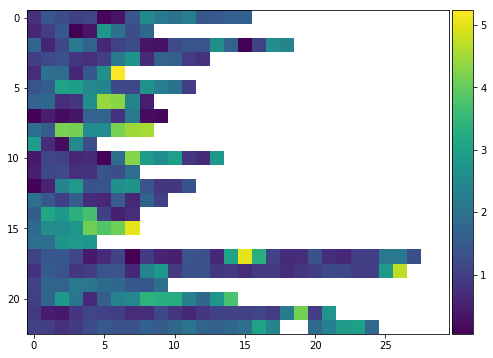

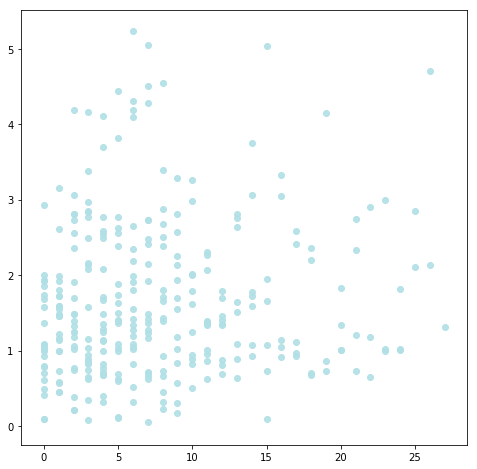

In [80]:
ri_filename = 'ris_F1.txt'    
empirical_ris = np.abs(np.loadtxt(ri_filename))
num_flies,max_ind = np.shape(empirical_ris)
empirical_ris[empirical_ris<0.01] = np.nan

plt.figure(figsize=(8,8))
ax = plt.subplot()
im = plt.imshow(empirical_ris)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

plt.figure(figsize=(8,8))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])